In [3]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm
from collections import Counter

sns.set_style("whitegrid")


In [ ]:
DATA = "clusteredData" 
IMAGE_EXTENSIONS = (".png", ".jpg", ".jpeg")

print("Classes found:", os.listdir(DATA))


Classes found: ['groupba', '.DS_Store', 'group pa', 'group7', 'group0', 'group9', 'group8', 'group1', 'group6', 'group3', 'group4', 'group5', 'group2']


In [6]:
records = []

for label in tqdm(os.listdir(DATA)):
    label_path = os.path.join(DATA, label)

    if not os.path.isdir(label_path):
        continue

    for file in os.listdir(label_path):
        if file.lower().endswith(IMAGE_EXTENSIONS):
            img_path = os.path.join(label_path, file)
            img = cv2.imread(img_path)

            if img is None:
                continue

            h, w, c = img.shape

            records.append({
                "label": label,
                "height": h,
                "width": w,
                "channels": c
            })

df = pd.DataFrame(records)
df.head()


100%|██████████| 13/13 [00:01<00:00, 11.18it/s]


,label,height,width,channels
0,groupba,78,52,3
1,groupba,53,66,3
2,groupba,57,62,3
3,groupba,62,50,3
4,groupba,21,24,3


In [7]:
print(f"Total images: {len(df)}")
df.info()


Total images: 5288
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5288 entries, 0 to 5287
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   label     5288 non-null   object
 1   height    5288 non-null   int64 
 2   width     5288 non-null   int64 
 3   channels  5288 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 165.4+ KB


In [8]:
df.describe()


,height,width,channels
count,5288.000000,5288.000000,5288.0
mean,77.955182,66.780257,3.0
std,202.657727,129.838175,0.0
min,8.000000,7.000000,3.0
25%,40.000000,36.000000,3.0
50%,54.000000,52.000000,3.0
75%,75.000000,69.000000,3.0
max,3104.000000,1936.000000,3.0


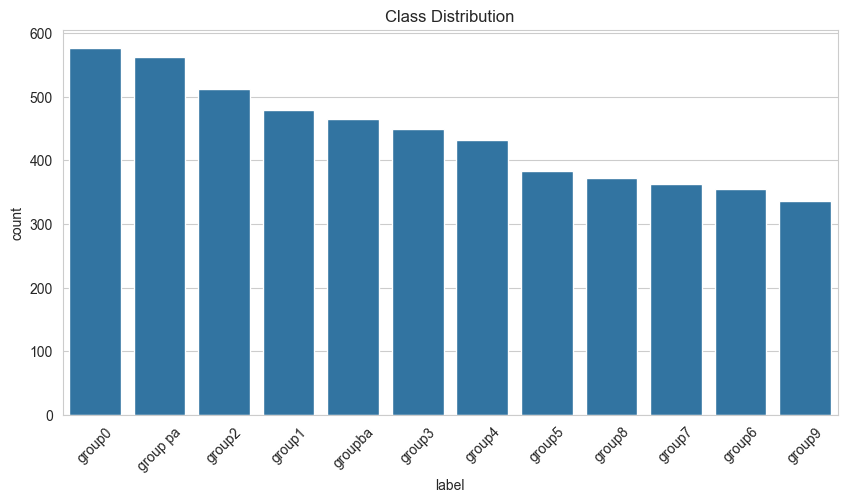

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(
    x="label",
    data=df,
    order=df["label"].value_counts().index
)
plt.title("Class Distribution")
plt.xticks(rotation=45)
plt.show()


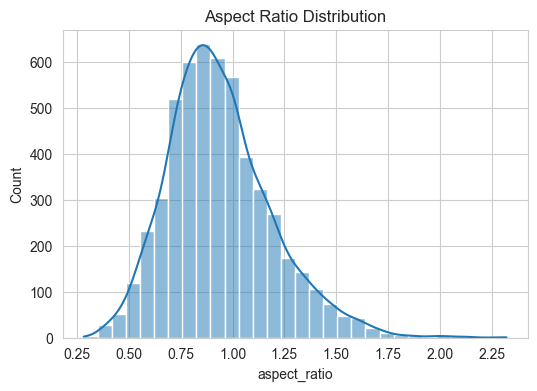

In [11]:
df["aspect_ratio"] = df["width"] / df["height"]

plt.figure(figsize=(6,4))
sns.histplot(df["aspect_ratio"], bins=30, kde=True)
plt.title("Aspect Ratio Distribution")
plt.show()
